In [1]:
from defectlib import extract_features_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
features, labels, sns, images = extract_features_from_defect('./ben1214/J4502/')
features_test, labels_test, sns_test, images_test = extract_features_from_defect('./defect_tensors_D10/J4502/')

features_all = np.concatenate((features, features_test))
labels_all = np.concatenate((labels, labels_test))
sns_all = np.concatenate((sns, sns_test))
images_all = np.concatenate((images, images_test))

there are 16 images inside J4502_8A_c1
Processing ./ben1214/J4502/8A/J4502_8A_c1/F3Y646209WMGY4TA 8AAAAAA_0.jpg...
there are 13 images inside J4502_8A_c10
Processing ./ben1214/J4502/8A/J4502_8A_c10/F3Y64350FAWGY4RA 8AAAAAA_0.jpg...
there are 16 images inside J4502_8A_c2
Processing ./ben1214/J4502/8A/J4502_8A_c2/F3Y64820ER7H3RNA 8AAAAAA_0.jpg...
there are 15 images inside J4502_8A_c0
Processing ./defect_tensors_D10/J4502/8A/J4502_8A_c0/0 8AAAAAA_0.jpg...
there are 4 images inside J4502_8A_c1
Processing ./defect_tensors_D10/J4502/8A/J4502_8A_c1/F3Y64920HUYGY4RA 8AAAAAA_0.jpg...
there are 8 images inside J4502_8A_c10
Processing ./defect_tensors_D10/J4502/8A/J4502_8A_c10/F3Y64831KY0H3RPA 8AAAAAA_0.jpg...
there are 3 images inside J4502_8A_c2
Processing ./defect_tensors_D10/J4502/8A/J4502_8A_c2/F3Y6494077SGY4TA 8AAAAAA_0.jpg...


In [3]:
labels_all = labesls_all

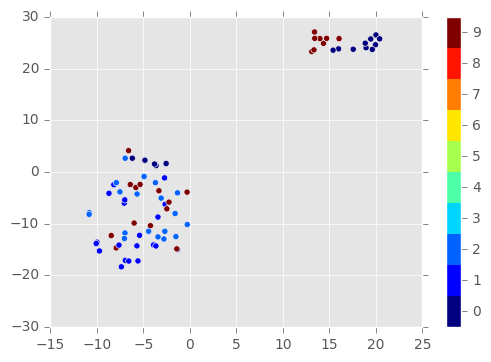

In [4]:
plot_tsne(features_all, labels_all, images_all, perplexity=10, interactive=False)

In [6]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.650000, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.578947, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.647059, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.650000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.578947, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.647059, total=   0.0s
[CV] kernel=linear, C=100 ....................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............. kernel=linear, C=100, score=0.647059, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.650000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.578947, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.647059, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.600000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.421053, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.470588, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [7]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    #for sn in set(sns_in_label):
        # print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 1 is 20
the number of class 10 is 21
the number of class 2 is 19
the number of class 0 is 15


In [8]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [9]:
vis_data = bh_sne(features_all, perplexity=10)
vis_x = vis_data[:,0]
vis_y = vis_data[:,1]

vis_data_0 = vis_data[labels_all=='0']
vis_data_1 = vis_data[labels_all=='1']
vis_data_2 = vis_data[labels_all=='2']
vis_data_10 = vis_data[labels_all=='10']

vis_data_0_x = vis_data_0[:,0]
vis_data_0_y = vis_data_0[:,1]
vis_data_1_x = vis_data_1[:,0]
vis_data_1_y = vis_data_1[:,1]
vis_data_2_x = vis_data_2[:,0]
vis_data_2_y = vis_data_2[:,1]
vis_data_10_x = vis_data_10[:,0]
vis_data_10_y = vis_data_10[:,1]

In [10]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source1 = ColumnDataSource(
        data=dict(
            x=vis_data_0_x,
            y=vis_data_0_y,
            desc=sns_all[labels_all=='0'],
            imgs = images_all[labels_all=='0']

        )
    )

source2 = ColumnDataSource(
        data=dict(
            x=vis_data_1_x,
            y=vis_data_1_y,
            desc=sns_all[labels_all=='1'],
            imgs=images_all[labels_all=='1']
        )
    )

source3 = ColumnDataSource(
        data=dict(
            x=vis_data_2_x,
            y=vis_data_2_y,
            desc=sns_all[labels_all=='2'],
            imgs=images_all[labels_all=='2']
        )
    )

source4 = ColumnDataSource(
        data=dict(
            x=vis_data_10_x,
            y=vis_data_10_y,
            desc=sns_all[labels_all=='10'],
            imgs=images_all[labels_all=='10']
        )
    )


hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="80" alt="@imgs" width="80"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, alpha=0.5, color='green', source=source1)
p.circle('x', 'y', size=20, alpha=0.5, color='red', source=source2)
p.circle('x', 'y', size=20, alpha=0.5, color='blue', source=source3)
p.circle('x', 'y', size=20, alpha=0.5, color='yellow', source=source4)

show(p)